In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from get_information_sprottenflotte import get_station_of_kiel
import plotly.express as px
import plotly.graph_objects as go
import plotly

In [2]:
 # Ignore error message.
pd.options.mode.chained_assignment = None  # default='warn'

Read the csv files with the attributes created by the get_information function. Merge the attributes with the lat and lon from the csv file with the informations about the stations

In [3]:
sf_attributes_df = pd.read_csv(r"./general_data/sprottenflotte_attributes_day.csv")
sf_attributes_df = sf_attributes_df.drop(columns=["Unnamed: 0", "Total_numbers_of_Bikes"])

sf_info_df = pd.read_csv(r"./general_data/sprottenflotte_station_information.csv")
sf_info_df = sf_info_df.drop(columns=["Unnamed: 0", "region_id", "address", "post_code"])

sf_attributes_lat_long_df = pd.merge(sf_attributes_df, sf_info_df, on=["Station_ID", "name"])
sf_attributes_lat_long_df

,Station_ID,Frequency_of_Usage,Avg_Number_of_Bikes,Avg_Usage_of_Station,Avg_Returning_Bike_of_Station,Avg_Renting_Bike_of_Station,name,lat,lon
0,24371,0.153118,26.125970,42.875000,27.000000,27.437500,Anleger Reventlou,54.333833,10.152250
1,24464,0.012043,11.375547,4.437500,1.125000,2.062500,Brandenburger Platz,54.243031,10.273862
2,24384,0.074409,1.859372,21.937500,10.875000,10.812500,CAU Universitätsbibliothek,54.346612,10.112408
3,24424,0.020000,5.475155,6.500000,2.312500,3.312500,Grüner Kranz,54.307944,9.649861
4,24468,0.001505,0.143668,1.375000,0.062500,0.187500,Catharinenberg,54.264403,10.065600
...,...,...,...,...,...,...,...,...,...
116,24396,0.015914,0.647630,5.250000,2.000000,2.062500,Rathaus Waisenhofstraße,54.321722,10.132444
117,24457,0.011183,0.097811,4.000000,1.312500,1.250000,Studiale,54.337879,10.124432
118,24416,0.018280,9.894093,6.187500,2.437500,2.625000,Rungholtplatz,54.361297,10.076831
119,24402,0.009462,14.233006,3.687500,1.937500,2.375000,Stadtteilzentrum Pries,54.395459,10.173146


The train station (Kieler Hauptbahnhof) is an Outlier. It has much more usage than the different stations. For the clustering we will not consider that station.

In [4]:
sf_attributes_kiel_df = get_station_of_kiel(sf_attributes_lat_long_df)
sf_attributes_kiel_wo_train_df = sf_attributes_kiel_df.loc[sf_attributes_kiel_df["Station_ID"] != 24397]
sf_attributes_kiel_wo_train_df

,Station_ID,Frequency_of_Usage,Avg_Number_of_Bikes,Avg_Usage_of_Station,Avg_Returning_Bike_of_Station,Avg_Renting_Bike_of_Station,name,lat,lon
0,24371,0.153118,26.125970,42.875000,27.000000,27.437500,Anleger Reventlou,54.333833,10.152250
2,24384,0.074409,1.859372,21.937500,10.875000,10.812500,CAU Universitätsbibliothek,54.346612,10.112408
4,24468,0.001505,0.143668,1.375000,0.062500,0.187500,Catharinenberg,54.264403,10.065600
5,24385,0.140430,3.055982,39.562500,18.750000,18.500000,Dreiecksplatz,54.328528,10.134417
7,26209,0.003656,3.479715,2.000000,0.687500,0.187500,Kanalfähre Holtenau,54.368794,10.133953
...,...,...,...,...,...,...,...,...,...
116,24396,0.015914,0.647630,5.250000,2.000000,2.062500,Rathaus Waisenhofstraße,54.321722,10.132444
117,24457,0.011183,0.097811,4.000000,1.312500,1.250000,Studiale,54.337879,10.124432
118,24416,0.018280,9.894093,6.187500,2.437500,2.625000,Rungholtplatz,54.361297,10.076831
119,24402,0.009462,14.233006,3.687500,1.937500,2.375000,Stadtteilzentrum Pries,54.395459,10.173146


Clean and Prep the DataFrame. We don't need the name of the Station and the Station_ID to be an attribute to be clustered. Also the total number of bikes it not relevant, because it is the same for all stations. For the clustering we don't want the lat and lon, because we want to cluster the usage of a station and see the similarity.

In [5]:
prep_sf_attributes_kiel_df = sf_attributes_kiel_wo_train_df.drop(columns=["Station_ID", "name", "lat", "lon"])

prep_sf_attributes_kiel_df

,Frequency_of_Usage,Avg_Number_of_Bikes,Avg_Usage_of_Station,Avg_Returning_Bike_of_Station,Avg_Renting_Bike_of_Station
0,0.153118,26.125970,42.875000,27.000000,27.437500
2,0.074409,1.859372,21.937500,10.875000,10.812500
4,0.001505,0.143668,1.375000,0.062500,0.187500
5,0.140430,3.055982,39.562500,18.750000,18.500000
7,0.003656,3.479715,2.000000,0.687500,0.187500
...,...,...,...,...,...
116,0.015914,0.647630,5.250000,2.000000,2.062500
117,0.011183,0.097811,4.000000,1.312500,1.250000
118,0.018280,9.894093,6.187500,2.437500,2.625000
119,0.009462,14.233006,3.687500,1.937500,2.375000


Try to find the Optimal Number of Clusters

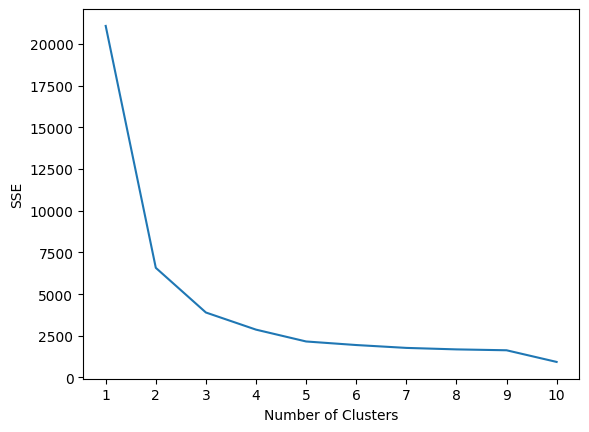

In [6]:
# initialize kmeans parameters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1
}


# create list to hold SSE (sum of squared errors) values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(prep_sf_attributes_kiel_df)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()




In this plot it appears that there is an bend at k = 3 clusters. So we will cluster with k = 3.

Perform K-Means Clustering with K = 3

In [7]:
# instantiate the k-means class, using 5 as a number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

# fit k-means algorithm to data
kmeans.fit(prep_sf_attributes_kiel_df)

# view cluster assignments for each observation
all_predictions = kmeans.predict(prep_sf_attributes_kiel_df)
all_predictions


array([0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1,
       2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2], dtype=int32)

Save the Cluster assignments in the dataframe

In [8]:
sf_attributes_clustered_kiel_df = sf_attributes_kiel_wo_train_df
sf_attributes_clustered_kiel_df["Cluster"] = all_predictions

# save with train station as cluster 4 to use for the most common routes
sf_attributes_kiel_w_train_df = sf_attributes_kiel_df.loc[sf_attributes_kiel_df["Station_ID"] == 24397]
sf_attributes_kiel_w_train_df["Cluster"] = 3
sf_attributes_clustered_kiel_w_train_df = sf_attributes_clustered_kiel_df.append(sf_attributes_kiel_w_train_df, ignore_index=True)

sf_attributes_clustered_kiel_w_train_df.to_csv("./general_data/sf_attributes_clustered_kiel_per_day.csv")

sf_attributes_clustered_kiel_df

/var/folders/g0/h5wttxk56wqb2bjprg3j7c4m0000gn/T/ipykernel_17638/3725141177.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sf_attributes_clustered_kiel_w_train_df = sf_attributes_clustered_kiel_df.append(sf_attributes_kiel_w_train_df, ignore_index=True)


,Station_ID,Frequency_of_Usage,Avg_Number_of_Bikes,Avg_Usage_of_Station,Avg_Returning_Bike_of_Station,Avg_Renting_Bike_of_Station,name,lat,lon,Cluster
0,24371,0.153118,26.125970,42.875000,27.000000,27.437500,Anleger Reventlou,54.333833,10.152250,0
2,24384,0.074409,1.859372,21.937500,10.875000,10.812500,CAU Universitätsbibliothek,54.346612,10.112408,1
4,24468,0.001505,0.143668,1.375000,0.062500,0.187500,Catharinenberg,54.264403,10.065600,2
5,24385,0.140430,3.055982,39.562500,18.750000,18.500000,Dreiecksplatz,54.328528,10.134417,0
7,26209,0.003656,3.479715,2.000000,0.687500,0.187500,Kanalfähre Holtenau,54.368794,10.133953,2
...,...,...,...,...,...,...,...,...,...,...
116,24396,0.015914,0.647630,5.250000,2.000000,2.062500,Rathaus Waisenhofstraße,54.321722,10.132444,2
117,24457,0.011183,0.097811,4.000000,1.312500,1.250000,Studiale,54.337879,10.124432,2
118,24416,0.018280,9.894093,6.187500,2.437500,2.625000,Rungholtplatz,54.361297,10.076831,2
119,24402,0.009462,14.233006,3.687500,1.937500,2.375000,Stadtteilzentrum Pries,54.395459,10.173146,2


Get information and save in a dataframe to visualize the plots.

In [9]:
cluster_0_df = sf_attributes_clustered_kiel_df.loc[sf_attributes_clustered_kiel_df["Cluster"] == 0]
cluster_1_df = sf_attributes_clustered_kiel_df.loc[sf_attributes_clustered_kiel_df["Cluster"] == 1]
cluster_2_df = sf_attributes_clustered_kiel_df.loc[sf_attributes_clustered_kiel_df["Cluster"] == 2]

train_station_df = sf_attributes_kiel_df.loc[sf_attributes_kiel_df["Station_ID"] == 24397]

name_cluster_0 = cluster_0_df.name
name_cluster_1 = cluster_1_df.name
name_cluster_2 = cluster_2_df.name
name_train_station = train_station_df.name


avg_renting_cluster_0 = cluster_0_df.Avg_Renting_Bike_of_Station
avg_renting_cluster_1 = cluster_1_df.Avg_Renting_Bike_of_Station
avg_renting_cluster_2 = cluster_2_df.Avg_Renting_Bike_of_Station
avg_renting_train_station = train_station_df.Avg_Renting_Bike_of_Station


avg_returning_cluster_0 = cluster_0_df.Avg_Returning_Bike_of_Station
avg_returning_cluster_1 = cluster_1_df.Avg_Returning_Bike_of_Station
avg_returning_cluster_2 = cluster_2_df.Avg_Returning_Bike_of_Station
avg_returning_train_station = train_station_df.Avg_Returning_Bike_of_Station


frequency_cluster_0 = cluster_0_df.Frequency_of_Usage
frequency_cluster_1 = cluster_1_df.Frequency_of_Usage
frequency_cluster_2 = cluster_2_df.Frequency_of_Usage
frequency_train_station = train_station_df.Frequency_of_Usage



Visualize three attributes: Frequency of Usage and the renting and returning of a Station with reference to the train station.

In [10]:

fig = go.Figure()

# add cluster 0 (most used stations)
fig.add_trace(go.Scatter3d(
    x = avg_returning_cluster_0,
    y = frequency_cluster_0,
    z = avg_renting_cluster_0,
    mode = "markers",
    marker = dict(size = 10,
                  line = dict(width = 4, color='DarkSlateGrey'),
                  color = '#3CB371'
                    ),
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{z}'
                    + '<br>Frequency of Usage: %{y}',
    name = "Cluster 0",
    text = name_cluster_0
    )
)

# add cluster 1 (second most used stations)
fig.add_trace(go.Scatter3d(
    x = avg_returning_cluster_1,
    y = frequency_cluster_1,
    z = avg_renting_cluster_1,
    mode = "markers",
    marker = dict(size = 10,
                  line = dict(width = 4, color='DarkSlateGrey'),
                  color = '#BA55D3'
                    ),
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{z}'
                    + '<br>Frequency of Usage: %{y}',
    name = "Cluster 1",
    text = name_cluster_1
    )
)
# add cluster 2 (station that are rarely used)
fig.add_trace(go.Scatter3d(
    x = avg_returning_cluster_2,
    y = frequency_cluster_2,
    z = avg_renting_cluster_2,
    mode = "markers",
    marker = dict(size = 10,
                  line = dict(width = 4, color='DarkSlateGrey'),
                  color = '#4682B4'
                    ),
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{z}'
                    + '<br>Frequency of Usage: %{y}',
    name = "Cluster 2",
    text = name_cluster_2
    )
)

# add train station for reference
fig.add_trace(go.Scatter3d(
    x = avg_returning_train_station,
    y = frequency_train_station,
    z = avg_renting_train_station,
    mode = "markers",
    marker = dict(size = 10,
                  line = dict(width = 4, color='DarkSlateGrey'),
                  color = '#FF6347'
                    ),
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{z}'
                    + '<br>Frequency of Usage: %{y}',
    name = "Kiel Hauptbahnhof",
    text = name_train_station
    )
)


fig.update_layout(
    autosize = True,
    hovermode = "closest",
    showlegend = True,
    width = 700,
    height = 700,
    margin = dict(l=0, r=0, b=0, t=0),
    legend = dict(bordercolor='rgb(100,100,100)',
                                borderwidth=2,
                                #itemclick='toggleothers',# when you are clicking an item in legend all that are not in the same group are hidden
                                x=0,
                                y=1),
    scene = dict(
                xaxis_title='Avg Returning Bike',
                yaxis_title='Frequency of Usage',
                zaxis_title='Avg Renting Bike'),
    scene_camera = dict(
                    eye = dict(x=1.7, y=-1.7, z=0.3)
                    )
)

#plotly.offline.plot(fig, filename=r"./plotly_vis/no_hbf_3_cluster_3D.html")
fig.show()

Visualize only Average of renting and returning with reference train station

In [11]:
fig = go.Figure()

# add cluster 0 
fig.add_trace(go.Scatter(
    y = avg_returning_cluster_0,
    x = avg_renting_cluster_0,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#3CB371'
                    ),
    #marker = {'size': 10, 'color': 'rgba(0,94,0,0.56)'},
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{y}',
    name = "frequenlty used",
    text = name_cluster_0
    )
)

# add cluster 1
fig.add_trace(go.Scatter(
    y = avg_returning_cluster_1,
    x = avg_renting_cluster_1,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#BA55D3'
                    ),
    #marker = {'size': 10, 'color': 'rgba(189,0,0,0.95)'},
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{y}',
    name = "infrequenlty used",
    text = name_cluster_1
    )
)
# add cluster 2 
fig.add_trace(go.Scatter(
    y = avg_returning_cluster_2,
    x = avg_renting_cluster_2,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#4682B4'
                    ),
    #marker = {'size': 10, 'color': 'rgba(0,0,192,0.85)'},
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{y}',
    name = "barely used",
    text = name_cluster_2
    )
)

# add train station for reference
fig.add_trace(go.Scatter(
    y = avg_returning_train_station,
    x = avg_renting_train_station,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#FF6347'
                    ),
    hovertemplate = 'Station name: %{text}'
                    + '<br>Avg Renting Bike: %{x}' 
                    + '<br>Avg Returning Bike: %{y}',
    name = "Kiel Hauptbahnhof",
    text = name_train_station
    )
)

fig.update_layout(
    #title = "Most common routes taken",
    autosize = True,
    hovermode = "closest",
    showlegend = True,
    width = 400,
    height = 400,
    margin = dict(l=0, r=0, b=0, t=0),
    legend = dict(bordercolor='rgb(100,100,100)',
                                borderwidth=2,
                                #itemclick='toggleothers',# when you are clicking an item in legend all that are not in the same group are hidden
                                x=0,
                                y=1),
    yaxis_title='Avg Returning Bike',
    xaxis_title='Avg Renting Bike',
)

#plotly.offline.plot(fig, filename=r"./plotly_vis/no_hbf_3_cluster_rent_ret.html")
fig.show()

We need to use dimension reduction to visualize our cluster in a 2D space. We will use PCA

In [12]:
pca = PCA(n_components=2)

scaled_df = StandardScaler().fit_transform(prep_sf_attributes_kiel_df)
scaled_df = pd.DataFrame(data=scaled_df, columns=["Frequency_of_Usage", "Avg_Number_of_Bikes", "Avg_Usage_of_Station",	
                                               "Avg_Returning_Bike_of_Station", "Avg_Renting_Bike_of_Station"])


pca_features = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_features, columns=["PC1", "PC2"])

# merge with clusters

pca_df["Cluster"] = all_predictions
pca_df

,PC1,PC2,Cluster
0,6.137875,3.194475,0
1,1.353669,-0.814859,1
2,-1.907431,-0.669772,2
3,3.972109,-0.993501,0
4,-1.722460,-0.062156,2
...,...,...,...
73,-1.297464,-0.664798,2
74,-1.525502,-0.737678,2
75,-0.911442,1.039248,2
76,-1.047760,1.899571,2


In [13]:
cluster_0_for_pca_df = pca_df.loc[pca_df["Cluster"] == 0]
cluster_1_for_pca_df = pca_df.loc[pca_df["Cluster"] == 1]
cluster_2_for_pca_df = pca_df.loc[pca_df["Cluster"] == 2]


pc2_cluster_0 = cluster_0_for_pca_df.PC2
pc2_cluster_1 = cluster_1_for_pca_df.PC2
pc2_cluster_2 = cluster_2_for_pca_df.PC2


pc1_cluster_0 = cluster_0_for_pca_df.PC1
pc1_cluster_1 = cluster_1_for_pca_df.PC1
pc1_cluster_2 = cluster_2_for_pca_df.PC1


fig = go.Figure()


# add cluster 0 
fig.add_trace(go.Scatter(
    x = pc1_cluster_0,
    y = pc2_cluster_0,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#3CB371'
                    ),
    name = "Cluster 0",
    )
)


# add cluster 1
fig.add_trace(go.Scatter(
    y = pc2_cluster_1,
    x = pc1_cluster_1,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#BA55D3'
                    ),
    name = "Cluster 1"
    )
)
# add cluster 2
fig.add_trace(go.Scatter(
    x = pc1_cluster_2,
    y = pc2_cluster_2,
    mode = "markers",
    marker = dict(size = 12,
                  line = dict(width = 2, color='DarkSlateGrey'),
                  color = '#4682B4'
                    ),
    name = "Cluster 2",
    )
)



fig.update_layout(
    #title = "Most common routes taken",
    autosize = True,
    hovermode = "closest",
    showlegend = True,
    width = 700,
    height = 700,
    margin = dict(l=0, r=0, b=0, t=0),
    legend = dict(bordercolor='rgb(100,100,100)',
                                borderwidth=2,
                                #itemclick='toggleothers',# when you are clicking an item in legend all that are not in the same group are hidden
                                x=0,
                                y=1),
    yaxis_title='PC2',
    xaxis_title='PC1',
)

#plotly.offline.plot(fig, filename=r"./plotly_vis/no_hbf_3_cluster_pca.html")
fig.show()

Save the dataframe with its clusters

Look at the clusters and their locations. Visualize it to see, if the location is relevant.

In [15]:
# access Token
mapbox_access_token = open(".mapbox_token").read()


# from the dataframe creating at the start, get the latidute and longetidue
lat_cluster_0 = cluster_0_df.lat
lat_cluster_1 = cluster_1_df.lat
lat_cluster_2 = cluster_2_df.lat
lat_train_station = train_station_df.lat


lon_cluster_0 = cluster_0_df.lon
lon_cluster_1 = cluster_1_df.lon
lon_cluster_2 = cluster_2_df.lon
lon_train_station = train_station_df.lon



# Create a plotly map and add the station points to the map
fig = go.Figure()

# add train station for reference
fig.add_trace(go.Scattermapbox(
    lat = lat_train_station,
    lon = lon_train_station,
    mode = "markers",
    marker = {'size': 100*frequency_train_station, 'color': '#FF6347', 'opacity': 1},
    hovertemplate = 'Station name: %{text}'
                    + '<br>Frequency of Usage: %{customdata}',
    name = "Kiel Hauptbahnhof",
    text = name_train_station,
    customdata = frequency_train_station
    )
)

# add cluster 0 
fig.add_trace(go.Scattermapbox(
    lat = lat_cluster_0,
    lon = lon_cluster_0,
    mode = "markers",
    marker = {'size': 100*frequency_cluster_0, 'color': '#3CB371', 'opacity': 1},
    #hoverinfo = 'text',
    text = name_cluster_0,
    name = "frequenlty used",
    customdata = frequency_cluster_0,
    hovertemplate = 'Station name: %{text}'
                    + '<br>Frequency of Usage: %{customdata}',
    )
)


# add cluster 1
fig.add_trace(go.Scattermapbox(
    lat = lat_cluster_1,
    lon = lon_cluster_1,
    mode = "markers",
    marker = {'size': 130*frequency_cluster_1, 'color': '#BA55D3', 'opacity': 1},    
    #hoverinfo = 'text',
    text = name_cluster_1,
    name = "infrequenlty used",
    customdata = frequency_cluster_1,
    hovertemplate = 'Station name: %{text}'
                    + '<br>Frequency of Usage: %{customdata}',
    )
)


# add cluster 2 
fig.add_trace(go.Scattermapbox(
    lat = lat_cluster_2,
    lon = lon_cluster_2,
    mode = "markers",
    marker = {'size': 200*frequency_cluster_2, 'color': '#4682B4', 'opacity': 1},
    text = name_cluster_2,
    name = "barely used",
    customdata = frequency_cluster_2,
    hovertemplate = 'Station name: %{text}'
                    + '<br>Frequency of Usage: %{customdata}',
    )
)

fig.update_layout(
    #title = "Most common routes taken",
    autosize = True,
    hovermode = "closest",
    showlegend = True,
    mapbox = dict(
        accesstoken = mapbox_access_token,
        center = dict(
            lat = 54.332111,
            lon = 10.134417,             
            ),
        zoom = 12,
        style = "light"
        ),
    width = 700,
    height = 700,
    margin = dict(l=0, r=0, b=0, t=0),
    legend = dict(bordercolor='rgb(100,100,100)',   
                                borderwidth=2,
                                x=0,
                                y=1)
)

#plotly.offline.plot(fig, filename=r"./plotly_vis/no_hbf_3_cluster_map.html")
fig.show()
